## Piecewise polytrope EoS of neutron stars ##
[Read et al. (2009)](https://ui.adsabs.harvard.edu/abs/2009PhRvD..79l4032R/abstract) provided the parametrized neutron-star equation of states (EoS) that were widely used. In that work, the EoS is assumed to be polytropic in three separate density ranges with three different polytropic indices, and the boundary points in density are $\rho_1=10^{14.7}\,{\rm g/cm^3}$ and $\rho_2=10^{15.0}\,{\rm g/cm^3}$, respectively. See Figure 2 of that paper for an illustration. Within each density range, the pressure is given by
\begin{equation}
P_i(\rho) = K_i \rho^{\Gamma_i} ,
\end{equation}
and the energy density is given by
\begin{equation}
\epsilon_i(\rho) = (1+a_i) \rho + \frac{P_i}{\Gamma_i-1} ,
\end{equation}
with
\begin{equation}
a_1 = 0;\quad a_i = \frac{\epsilon(\rho_{i-1})}{\rho_{i-1}} - 1 - \frac{K_i}{\Gamma_i-1} \rho_{i-1}^{\Gamma_{i-1}} \quad({\rm for}~i=2, 3).
\end{equation}
A neutron star EoS is then given by a set of parameters $(P_1, \Gamma_1, \Gamma_2, \Gamma_3)$. Table III of Read et al. (2009) lists the values of these parameters for a large number of neutron star EoS's.

As an example, the code below plots the "SlY" EoS:

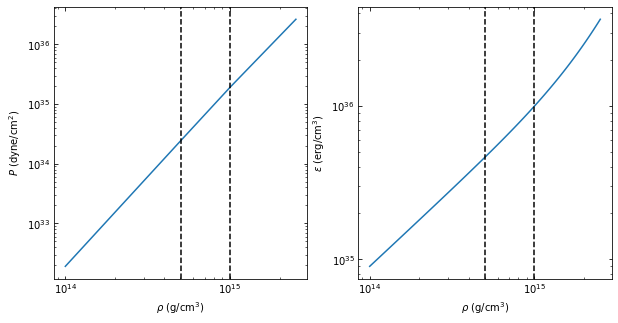

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

def cgs_to_geo(rho,p=0):
    ''' convert parameters in cgs units to geometric units (G=c=1). '''
    rho_cgs=rho*(u.g/u.cm**3)
    p_cgs=p*(u.dyn/u.cm**2)
    c=3e10*u.cm/u.s
    G=6.67e-8*u.cm**3/u.g/u.s**2
    rho_geo=(rho_cgs*G/c**2).to(u.cm**(-2))
    p_geo=(p_cgs*G/c**4).to(u.cm**(-2))
    return rho_geo.value,p_geo.value

def geo_to_cgs(rho,p,e):
    ''' convert parameters in geometric units (G=c=1) to cgs units. '''
    rho_geo=rho*(u.cm**(-2))
    p_geo=p*(u.cm**(-2))
    e_geo=e*(u.cm**(-2))
    c=3e10*u.cm/u.s
    G=6.67e-8*u.cm**3/u.g/u.s**2
    rho_cgs=(rho_geo*c**2/G).to(u.g/u.cm**3)
    p_cgs=(p_geo*c**4/G).to(u.dyn/u.cm**2)
    e_cgs=(e_geo*c**4/G).to(u.erg/u.cm**3)
    return rho_cgs.value,p_cgs.value,e_cgs.value

def get_EoS_profile(rho_cgs, P_1_cgs, Gamma_1, Gamma_2, Gamma_3):
    ''' numerically evaluate the NS EoS at the given set of density values for a given EoS that is parameterized by (P_1, Gamma_1, Gamma_2, Gamma_3). '''
    rho_geo, P_1 = cgs_to_geo(rho_cgs, P_1_cgs)
    ## input unit: geometric unit
    p=np.zeros_like(rho_geo)
    e=np.zeros_like(rho_geo)
    RHO1,_=cgs_to_geo(10**14.7);RHO2,_=cgs_to_geo(10**15)
    ## first region
    cond1=rho_geo<=RHO1
    K1=P_1/(RHO1**Gamma_1)
    A_1=0
    P_1=P_1;p[cond1]=K1*rho_geo[cond1]**Gamma_1
    E_1=RHO1*(1+A_1)+P_1/(Gamma_1-1);e[cond1]=(1+A_1)*rho_geo[cond1]+p[cond1]/(Gamma_1-1)
    ## second region
    cond2=(rho_geo>RHO1)&(rho_geo<=RHO2)
    K2=P_1/(RHO1**Gamma_2)
    P_2=K2*RHO2**Gamma_2;p[cond2]=K2*rho_geo[cond2]**Gamma_2
    A_2=E_1/RHO1-1-K2/(Gamma_2-1)*RHO1**(Gamma_2-1)
    E_2=RHO2*(1+A_2)+P_2/(Gamma_2-1);e[cond2]=(1+A_2)*rho_geo[cond2]+p[cond2]/(Gamma_2-1)
    ## third region
    cond3=rho_geo>RHO2
    K3=P_2/(RHO2**Gamma_3)
    P_3=K3*rho_geo[cond3]**Gamma_3;p[cond3]=K3*rho_geo[cond3]**Gamma_3
    A_3=E_2/RHO2-1-K3/(Gamma_3-1)*RHO2**(Gamma_3-1)
    E_3=rho_geo[cond3]*(1+A_3)+P_3/(Gamma_3-1);e[cond3]=(1+A_3)*rho_geo[cond3]+p[cond3]/(Gamma_3-1)
    ## unit conversion
    rho_cgs, p_cgs, e_cgs = geo_to_cgs(rho_geo, p, e)
    return rho_cgs, p_cgs, e_cgs

## Below are the parameters of the 'SLy' EoS, given by Table III of Read et al. (2009) ##
P_1_cgs, Gamma_1, Gamma_2, Gamma_3 = 10**34.384,3.005,2.988,2.851

rho_cgs = np.logspace(14, 15.4, 100)
rho_cgs, p_cgs, e_cgs = get_EoS_profile(rho_cgs, P_1_cgs, Gamma_1, Gamma_2, Gamma_3)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(rho_cgs, p_cgs)
axs[1].plot(rho_cgs, e_cgs)

for ax in axs:
    ax.axvline(10**14.7, ls='--', color='k')
    ax.axvline(10**15.0, ls='--', color='k')

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$\rho$ (g/cm$^3$)')
axs[0].set_ylabel(r'$P$ (dyne/cm$^2$)')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$\rho$ (g/cm$^3$)')
axs[1].set_ylabel(r'$\epsilon$ (erg/cm$^3$)')
plt.show()

The above EoS can then be used as input for the TOV solver, [PYTOV](https://github.com/dlwhittenbury/PYTOV), to solve for the neutron star mass--radius relation.

Two things to be aware of:
1. PYTOV requires two EOS input files, one for low-density range and one for high-density range. Only the high-density EoS is uncertain and needs to be replaced.
2. PYTOV input files require special units: density in [fm^-3], pressure in [MeV fm^-3], and energy density in [MeV fm^-3].